In [7]:
import math


# to get list of indexes from a list
def index_list (list_):
    index_list = []
    for i in range(len(list_)):
        index_list.append(i)
    return index_list


def rank_i (solutions, f1, f2):
    rank =[]
    for k in index_list(solutions):
        n_i = 0
        for (i,j) in zip(f1, f2):
            if i < f1[k] and j<f2[k]:
                n_i+=1
                k
        r = 1+n_i
        rank.append(r)
    return rank

def count_of_previous_solutions (i, rank):
    
    d =[]
    for i in range (0,i):
        d.append( rank.count(i))
    return sum(d)

def average_fit_i (rank):
    average_fit= []
    for i in rank:
        average_fit.append(len(solutions)-count_of_previous_solutions(i, rank)-0.5*(rank.count(i)-1))
    return average_fit

def rank_sol_no(rank, solutions, average_fit):
    
    ranked_solutions= []
    ranked_no = []
    ranked_f1 = []
    ranked_f2 = []
    ranked_average_fit = []

    for i in range (1,max(rank)+1):
        ranked_sol = []
        ran_f1 = []
        ran_f2 = []
        ran_average_fit = []
        for j in zip(solutions, rank, f1, f2, average_fit):
            if i == j[1]:
                ranked_sol.append(j[0])
                ran_f1.append(j[2])
                ran_f2.append(j[3])
                ran_average_fit.append(j[4])
                continue
            else:
                continue
        if len(ranked_sol)>0:
            ranked_solutions.append(ranked_sol)
            ranked_no.append(i)
            ranked_f1.append(ran_f1)
            ranked_f2.append(ran_f2)
            ranked_average_fit.append(ran_average_fit)

    return (ranked_solutions, ranked_no, ranked_f1, ranked_f2, ranked_average_fit)

def scaled_fitness (f1, f2, average_fit,f1_min,f2_min,f1_max,f2_max):
    #f1_min = round(float(min(f1)), 1)
    #f2_min = round(min(f2), 1)
    #f1_max = round(max(f1)+0.6)
    #f2_max = round(max(f2)+0.6)

    niche_count = []
    ass_shared_fit = []
    scaled_fitness = []
    
    for (j,k, p) in zip(f1, f2, average_fit):
        #print(f"j = {j}, k = {k}, p = {p}")
        assigned_shared_fit = []
        niche = []
        scaled_fit = []
        for (l,m, q) in zip (j,k, p):
            #print(f" l = {l}, m = {m}, q = {q}")
            share_fit = []
            for (n,o) in zip(j,k):
                #print(f" n = {n}, o = {o}")
                alpha = 1
                distance = math.sqrt((((l-n)/(f1_max-f1_min))**2)+ (((m-o)/(f2_max-f2_min))**2))
                if distance<=sigma_share:
                    share_fitness = 1-((distance/sigma_share)**alpha)
                else:
                    share_fitness = 0
                share_fit.append(share_fitness)
                #print(f"share_fitness{share_fitness}")
            niche.append(sum(share_fit))
            assigned_shared_fit.append(q/(sum(share_fit)))
            
            #print( f"niche  = {niche}")
        
        
        niche_count.append(niche)
        ass_shared_fit.append(assigned_shared_fit)
        #print( f"niche_count  = {niche_count}")
        #print(f"ass_shared_fit = {ass_shared_fit}")
        for r in assigned_shared_fit:
            scaled_fit.append(r*((q*len(j))/(sum(assigned_shared_fit))))
        scaled_fitness.append(scaled_fit)
    return (niche_count, ass_shared_fit, scaled_fitness)


def rearranged_fit (ranked_solutions, scaled_fit):
    rearranged_fit = []
    for (i,j) in zip(ranked_solutions, scaled_fit):
        #print(f" i,j  = {i,j}")
        for (k,l) in zip(i,j):
            #print(f"k,l = {k,l}")
            rearranged_fit.insert(solutions.index(k), l)
    return rearranged_fit



def moga (solutions, f1, f2):
    f1 = f1
    f2 = f2
    solutions = solutions
    rank = rank_i(solutions, f1, f2)
    #print(f"rank is {rank}")
    average_fit= average_fit_i(rank)
    #print(f"average_fit is {average_fit}")
    ranked_solutions = rank_sol_no(rank, solutions, average_fit)
    #print(f"ranked_solution is {ranked_solutions}")
    #f1_min = 0.1
    #f1_max = 1
    #f2_min = 1
    #f2_max = 10
    f1_min = round(min(f1), 1)
    f2_min = round(min(f2), 1)
    f1_max = round(max(f1)+0.6)
    f2_max = round(max(f2)+0.6)
    scaled_fit = scaled_fitness( ranked_solutions[2], ranked_solutions[3], ranked_solutions[4],f1_min,f2_min,f1_max,f2_max)
    rearranged_fitness = rearranged_fit(ranked_solutions[0], scaled_fit[2])

    return (rank, rearranged_fitness)

***




`An example from "Multi-Objective Optimization using Evolutionary Algorithms" book by Kalyanmoy Deb. (page: 193 - 195), results in table 16`






***




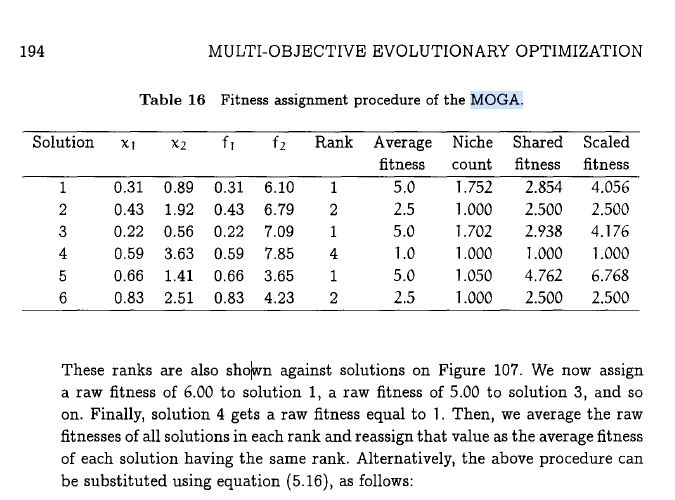


In [17]:
# input
f1 = [0.31, 0.43, 0.22, 0.59, 0.66, 0.83]
f2 = [6.1, 6.79, 7.09, 7.85, 3.65, 4.23]
solutions = [1,2,3,4,5,6]

sigma_share = 0.5
f1_min = 0.1
f2_min = 1
f1_max = 1
f2_max = 10

In [18]:
rank = rank_i(solutions, f1, f2)
average_fit= average_fit_i(rank)
ranked_solutions = rank_sol_no(rank, solutions, average_fit)
scaled_fit = scaled_fitness( ranked_solutions[2], ranked_solutions[3], ranked_solutions[4],f1_min,f2_min,f1_max,f2_max)
rearranged_fitness = rearranged_fit(ranked_solutions[0], scaled_fit[2])

In [19]:
rank

[1, 2, 1, 4, 1, 2]

In [20]:
average_fit

[5.0, 2.5, 5.0, 1.0, 5.0, 2.5]

In [21]:
ranked_solutions

([[1, 3, 5], [2, 6], [4]],
 [1, 2, 4],
 [[0.31, 0.22, 0.66], [0.43, 0.83], [0.59]],
 [[6.1, 7.09, 3.65], [6.79, 4.23], [7.85]],
 [[5.0, 5.0, 5.0], [2.5, 2.5], [1.0]])

In [22]:
scaled_fit

([[1.7532798549410087, 1.7026786250536299, 1.0506012298873788],
  [1.0, 1.0],
  [1.0]],
 [[2.851798009262036, 2.936549461788488, 4.7591796561441155],
  [2.5, 2.5],
  [1.0]],
 [[4.055639736506472, 4.176167683253257, 6.768192580240269],
  [2.5, 2.5],
  [1.0]])

In [24]:
rearranged_fitness

[4.055639736506472, 2.5, 4.176167683253257, 1.0, 6.768192580240269, 2.5]